# Kickstarter Success Prediction Model 

In [2]:
import numpy as np
import pandas as pd
import kaggle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

Webscraping through Kaggle API

In [3]:
kaggle.api.dataset_download_files('ulrikthygepedersen/kickstarter-projects', path='kaggle', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects


Simple data exploration

In [4]:
df = pd.read_csv('kaggle/kickstarter_projects.csv')
# we want to use Genre (category), Goal, Length of Campaign (launched - deadline), Deadline, Number of backers
print(df.head())
print(df.info())
print(df.isna().sum())

           ID                                               Name  \
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country             Launched    Deadline  \
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31   
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    Goal  Pledged  Backers       State  
0   1000      625       30      Failed  
1  80000       22     

In [5]:
# add duration of campaign as a column to the dataframe through pd.to_datetime
df['Deadline'] = pd.to_datetime(df['Deadline'])
df['Launched'] = pd.to_datetime(df['Launched'])

df['Duration'] = (df['Deadline'] - df['Launched']).dt.days # result is length of Kickstarter campaign in days

In [6]:
df_simplified = df[df['State'].isin(['Successful', 'Failed', 'Canceled'])].copy()
df_simplified['Success'] = df['State'].apply(lambda x: 1 if x == 'Successful' else 0)

In [7]:
print(df_simplified.head())

           ID                                               Name  \
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country            Launched   Deadline  \
0       Fashion       Fashion  United States 2009-04-21 21:02:48 2009-05-31   
1  Film & Video        Shorts  United States 2009-04-23 00:07:53 2009-07-20   
2           Art  Illustration  United States 2009-04-24 21:52:03 2009-05-03   
3    Technology      Software  United States 2009-04-25 17:36:21 2009-07-14   
4       Fashion       Fashion  United States 2009-04-27 14:10:39 2009-05-26   

    Goal  Pledged  Backers       State  Duration  Success  
0   1000      625       30      Failed        39        

In [8]:
df_simplified['Pct_pledged'] = df_simplified['Pledged'] / df_simplified['Goal']

Add Normalization

In [9]:
# Log-scale Normalization for better visualization -- there are a lot of outliers in this dataset
df_standard = df_simplified.copy()
df_standard = df_standard[['Duration', 'Goal', 'Backers', 'Pledged']]

normalized_df = np.log1p(df_standard)

In [10]:
normalized_df

,Duration,Goal,Backers,Pledged
0,3.688879,6.908755,3.433987,6.439350
1,4.477337,11.289794,1.386294,3.135494
2,2.197225,3.044522,1.386294,3.583519
3,4.382027,4.605170,3.258097,4.983607
4,3.367296,7.550135,2.397895,5.961005
...,...,...,...,...
374605,1.098612,5.973810,1.945910,6.244167
374635,2.995732,11.512935,0.000000,0.000000
374703,1.609438,6.908755,0.693147,0.693147
374731,2.639057,4.919981,1.945910,4.369448


In [11]:
df_simplified["duration_normalized"] = normalized_df['Duration']
df_simplified["backers_normalized"] = normalized_df['Backers']
df_simplified["goal_normalized"] = normalized_df['Goal']
df_simplified["pledged_normalized"] = normalized_df['Pledged']

In [12]:
df_simplified

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration,Success,Pct_pledged,duration_normalized,backers_normalized,goal_normalized,pledged_normalized
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39,0,0.625000,3.688879,3.433987,6.908755,6.439350
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87,0,0.000275,4.477337,1.386294,11.289794,3.135494
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8,1,1.750000,2.197225,1.386294,3.044522,3.583519
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79,1,1.464646,4.382027,3.258097,4.605170,4.983607
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28,0,0.203684,3.367296,2.397895,7.550135,5.961005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,Successful,2,1,1.311224,1.098612,1.945910,5.973810,6.244167
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,Canceled,19,0,0.000000,2.995732,0.000000,11.512935,0.000000
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,Canceled,4,0,0.001000,1.609438,0.693147,6.908755,0.693147
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,Canceled,13,0,0.573529,2.639057,1.945910,4.919981,4.369448


Add CPI Data

In [13]:
cpi_data = pd.read_csv('CPI Data - Sheet1.csv', header=None)
cpi_data = cpi_data.drop(cpi_data.columns[-2:], axis=1)

In [14]:
cpi_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2009,1.7,1.8,1.8,1.9,1.8,1.7,1.5,1.4,1.5,1.7,1.7,1.8
1,2010,1.6,1.3,1.1,0.9,0.9,0.9,0.9,0.9,0.8,0.6,0.8,0.8
2,2011,1.0,1.1,1.2,1.3,1.5,1.6,1.8,2.0,2.0,2.1,2.2,2.2
3,2012,2.3,2.2,2.3,2.3,2.3,2.2,2.1,1.9,2.0,2.0,1.9,1.9
4,2013,1.9,2.0,1.9,1.7,1.7,1.6,1.7,1.8,1.7,1.7,1.7,1.7
5,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6
6,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1
7,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2
8,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8
9,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2


In [15]:
# convert cpi_data into a long array for better merging
cpi_data_long = cpi_data.melt(id_vars=[0], var_name='Month', value_name='CPI')
cpi_data_long.rename(columns={0: 'Year'}, inplace=True)

cpi_data_long['Month'] = cpi_data_long['Month'].astype(int)

cpi_data_long

,Year,Month,CPI
0,2009,1,1.7
1,2010,1,1.6
2,2011,1,1.0
3,2012,1,2.3
4,2013,1,1.9
...,...,...,...
115,2014,12,1.6
116,2015,12,2.1
117,2016,12,2.2
118,2017,12,1.8


In [16]:
df_simplified['Year'] = pd.to_datetime(df_simplified['Deadline']).dt.year
df_simplified['Month'] = pd.to_datetime(df_simplified['Deadline']).dt.month

In [17]:
# merge the CPI data with df_simplified
df_merged = df_simplified.merge(cpi_data_long, on=['Year', 'Month'], how='left')

df_merged.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,...,Duration,Success,Pct_pledged,duration_normalized,backers_normalized,goal_normalized,pledged_normalized,Year,Month,CPI
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,...,39,0,0.625000,3.688879,3.433987,6.908755,6.439350,2009,5,1.8
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,...,87,0,0.000275,4.477337,1.386294,11.289794,3.135494,2009,7,1.5
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,...,8,1,1.750000,2.197225,1.386294,3.044522,3.583519,2009,5,1.8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,...,79,1,1.464646,4.382027,3.258097,4.605170,4.983607,2009,7,1.5
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,...,28,0,0.203684,3.367296,2.397895,7.550135,5.961005,2009,5,1.8


In [18]:
# clean NaN values
df_simplified['CPI'] = df_merged['CPI']
df_simplified = df_simplified.dropna(subset=['CPI'])
df_simplified

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,...,Duration,Success,Pct_pledged,duration_normalized,backers_normalized,goal_normalized,pledged_normalized,Year,Month,CPI
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,...,39,0,0.625000,3.688879,3.433987,6.908755,6.439350,2009,5,1.8
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,...,87,0,0.000275,4.477337,1.386294,11.289794,3.135494,2009,7,1.5
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,...,8,1,1.750000,2.197225,1.386294,3.044522,3.583519,2009,5,1.8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,...,79,1,1.464646,4.382027,3.258097,4.605170,4.983607,2009,7,1.5
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,...,28,0,0.203684,3.367296,2.397895,7.550135,5.961005,2009,5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370208,1286688165,Bestiarum Enamel Pins,Art,Art,United States,2017-11-17 18:03:27,2017-12-01,1000,2250,86,...,13,1,2.250000,2.639057,4.465908,6.908755,7.719130,2017,12,1.8
370209,1858920253,Growing the PSYDAILY Blog Resources,Publishing,Academic,United States,2017-11-17 18:03:43,2017-12-17,2000,0,0,...,29,0,0.000000,3.401197,0.000000,7.601402,0.000000,2017,12,1.8
370210,2087585969,Original illustrations of Zodiac Signs.,Design,Design,United States,2017-11-17 18:12:45,2017-12-19,3000,114,1,...,31,0,0.038000,3.465736,0.693147,8.006701,4.744932,2017,12,1.8
370211,1260215200,Bastil - Fundraiser Donate $25 PLEASE HELP {$3...,Design,Design,United States,2017-11-17 18:16:14,2017-12-17,37500,50,1,...,29,0,0.001333,3.401197,0.693147,10.532123,3.931826,2017,12,1.8


Add GDP Data

In [19]:
gdp_data = pd.read_csv('GDP Data - Sheet1.csv')
gdp_data.head()

,Year,Quarter,Real GDP,Real GDI
0,2018,Q4,0.6,1.7
1,2018,Q3,2.5,4.0
2,2018,Q2,2.1,2.4
3,2018,Q1,3.3,2.9
4,2017,Q4,4.6,4.3


In [20]:
quarter_to_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}

# reformat GDP data 
gdp_data['Month'] = gdp_data['Quarter'].map(quarter_to_month)
gdp_data = gdp_data.rename(columns={'Year': 'GDP_Year', 'GDP': 'GDP_Value'})  
gdp_data['Year'] = gdp_data['GDP_Year']

In [21]:
# determine the quarters for df_simplified based on deadline month
df_simplified['Quarter'] = pd.cut(
    df_simplified['Month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    right=True
)

df_simplified

C:\Users\josep\AppData\Local\Temp\ipykernel_28740\2858163111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['Quarter'] = pd.cut(


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,...,Success,Pct_pledged,duration_normalized,backers_normalized,goal_normalized,pledged_normalized,Year,Month,CPI,Quarter
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,...,0,0.625000,3.688879,3.433987,6.908755,6.439350,2009,5,1.8,Q2
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,...,0,0.000275,4.477337,1.386294,11.289794,3.135494,2009,7,1.5,Q3
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,...,1,1.750000,2.197225,1.386294,3.044522,3.583519,2009,5,1.8,Q2
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,...,1,1.464646,4.382027,3.258097,4.605170,4.983607,2009,7,1.5,Q3
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,...,0,0.203684,3.367296,2.397895,7.550135,5.961005,2009,5,1.8,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370208,1286688165,Bestiarum Enamel Pins,Art,Art,United States,2017-11-17 18:03:27,2017-12-01,1000,2250,86,...,1,2.250000,2.639057,4.465908,6.908755,7.719130,2017,12,1.8,Q4
370209,1858920253,Growing the PSYDAILY Blog Resources,Publishing,Academic,United States,2017-11-17 18:03:43,2017-12-17,2000,0,0,...,0,0.000000,3.401197,0.000000,7.601402,0.000000,2017,12,1.8,Q4
370210,2087585969,Original illustrations of Zodiac Signs.,Design,Design,United States,2017-11-17 18:12:45,2017-12-19,3000,114,1,...,0,0.038000,3.465736,0.693147,8.006701,4.744932,2017,12,1.8,Q4
370211,1260215200,Bastil - Fundraiser Donate $25 PLEASE HELP {$3...,Design,Design,United States,2017-11-17 18:16:14,2017-12-17,37500,50,1,...,0,0.001333,3.401197,0.693147,10.532123,3.931826,2017,12,1.8,Q4


In [22]:
# Merge df_simplified with GDP data using "Quarter" as the key
df_merged = df_simplified.merge(gdp_data, on=['Year', 'Quarter'], how='left')

print(df_merged.head())

           ID                                               Name  \
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country            Launched   Deadline  \
0       Fashion       Fashion  United States 2009-04-21 21:02:48 2009-05-31   
1  Film & Video        Shorts  United States 2009-04-23 00:07:53 2009-07-20   
2           Art  Illustration  United States 2009-04-24 21:52:03 2009-05-03   
3    Technology      Software  United States 2009-04-25 17:36:21 2009-07-14   
4       Fashion       Fashion  United States 2009-04-27 14:10:39 2009-05-26   

    Goal  Pledged  Backers  ... goal_normalized  pledged_normalized  Year  \
0   1000      625       30  ...        

In [23]:
df_simplified['Real GDP'] = df_merged['Real GDP']
df_simplified['Real GDI'] = df_merged['Real GDI']

C:\Users\josep\AppData\Local\Temp\ipykernel_28740\3478218866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['Real GDP'] = df_merged['Real GDP']
C:\Users\josep\AppData\Local\Temp\ipykernel_28740\3478218866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['Real GDI'] = df_merged['Real GDI']


### Data Visualization

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Heatmap

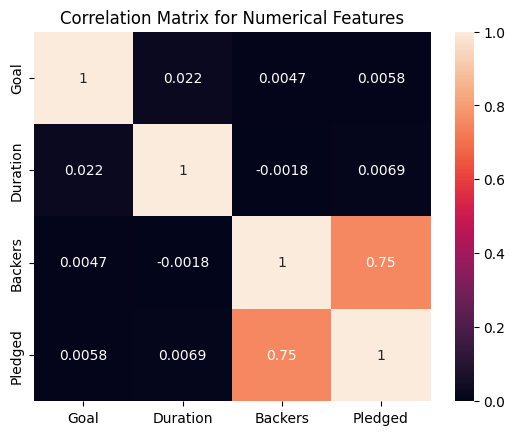

In [25]:
plt.figure()
sns.heatmap(df_simplified[['Goal', 'Duration', 'Backers', 'Pledged']].corr(), annot=True)
plt.title('Correlation Matrix for Numerical Features')
plt.show() # highest correlation between  number of backers and amount pledged

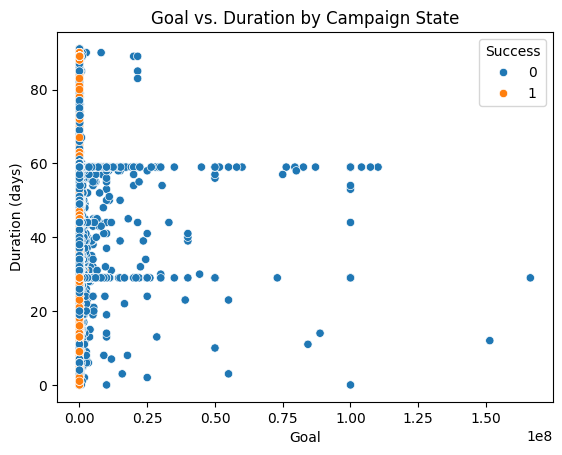

In [26]:
plt.figure() # shows a correlation between Duration and State
sns.scatterplot(x='Goal', y='Duration', hue='Success', data=df_simplified)
plt.title('Goal vs. Duration by Campaign State')
plt.xlabel('Goal')
plt.ylabel('Duration (days)')
plt.show()

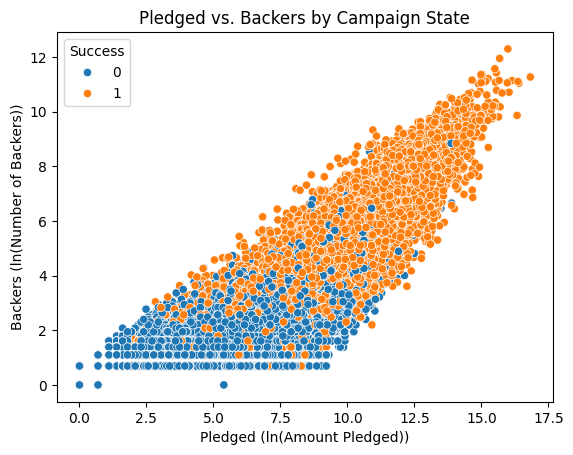

In [27]:
plt.figure() # shows a correlation between amount pledged and number of backers (intuitively)
sns.scatterplot(x='pledged_normalized', y='backers_normalized', hue='Success', data=df_simplified)
plt.title('Pledged vs. Backers by Campaign State')
plt.xlabel('Pledged (ln(Amount Pledged))')
plt.ylabel('Backers (ln(Number of Backers))')
plt.show() # the higher the amount pledged, the more the presence of success

Implementing GDP and CPI data

In [28]:
aggregated_data = df_simplified.groupby(['Year', 'Month']).agg(
    Success_Rate=('Success', 'mean'),
    Amount_Pledged=('Pledged', 'sum')
    ).reset_index() # calculating success rate by month (number of success / total campaigns)

In [29]:
num_campaigns = df_simplified.groupby(['Year', 'Month']).size().reset_index(name='Num_Campaigns')

aggregated_data = aggregated_data.merge(num_campaigns, on=['Year', 'Month'], how='left')

In [30]:
aggregated_data['Quarter'] = pd.cut(
    aggregated_data['Month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    right=True
)

In [31]:
aggregated_data = aggregated_data.merge(cpi_data_long, on=['Year', 'Month'], how='left')
aggregated_data = aggregated_data.merge(gdp_data, on=['Year', 'Quarter'], how='left')

In [32]:
# Reformatting data so that we can look at timeline plots
aggregated_data.rename(columns={'Month_x': 'Month'}, inplace=True)

In [33]:
aggregated_data['Date'] = pd.to_datetime(aggregated_data[['Year', 'Month']].assign(day=1))

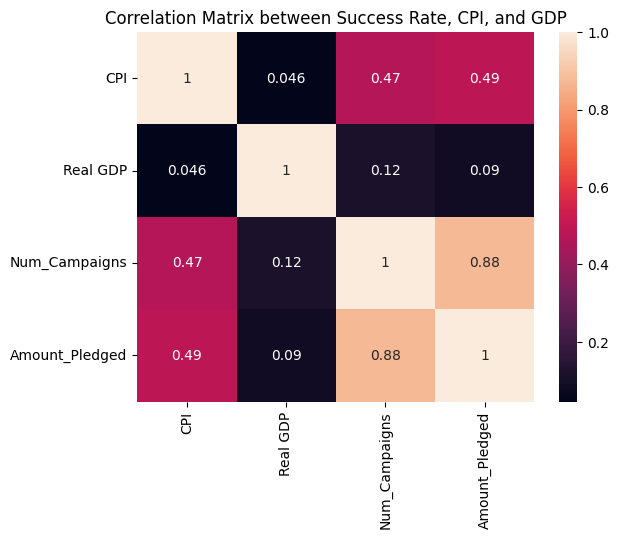

In [34]:
plt.figure()
sns.heatmap(aggregated_data[['CPI', 'Real GDP', 'Num_Campaigns', 'Amount_Pledged']].corr(), annot=True)
plt.title('Correlation Matrix between Success Rate, CPI, and GDP')
plt.show()
# distinct negative correlation between success rate and CPI -- we will have to examine further

In [35]:
# timeline plots
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
# normalizing data for better visualization
aggregated_data[['Normalized_Success_Rate', 'Normalized_CPI', 'Normalized_Real_GDP', 'Normalized_Num_Campaigns', 'Normalized_Amount_Pledged']] = scaler.fit_transform(
    aggregated_data[['Success_Rate', 'CPI', 'Real GDP', 'Num_Campaigns', 'Amount_Pledged']]
)

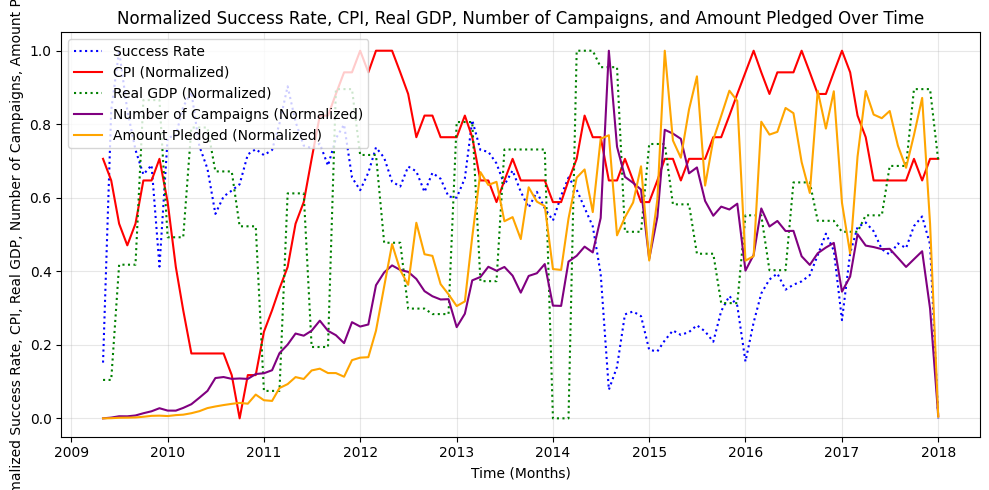

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# plot normalized success rate, CPI and GDP on primary y-axis
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Success_Rate'], label='Success Rate', linestyle=':', color='blue')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_CPI'], label='CPI (Normalized)', color='red')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Real_GDP'], label='Real GDP (Normalized)', linestyle=':',color='green')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Num_Campaigns'], label='Number of Campaigns (Normalized)', color='purple')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Amount_Pledged'], label='Amount Pledged (Normalized)', color='orange')

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Normalized Success Rate, CPI, Real GDP, Number of Campaigns, Amount Pledged')
ax1.legend(loc='upper left')

# add gridlines and title before showing
plt.title('Normalized Success Rate, CPI, Real GDP, Number of Campaigns, and Amount Pledged Over Time')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# examining negative correlation between Success Rate and CPI

Success Rate, Number of Campaigns, and Total Amount Pledged By Month (compared to CPI and GDP)

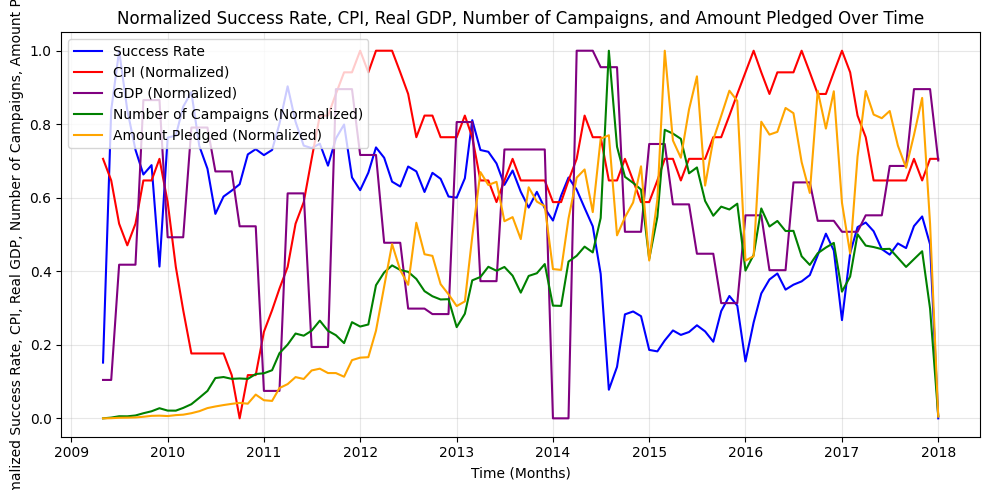

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# plot normalized success rate, CPI and GDP on primary y-axis
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Success_Rate'], label='Success Rate', color='blue')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_CPI'], label='CPI (Normalized)', color='red')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Real_GDP'], label='GDP (Normalized)', color='purple')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Num_Campaigns'], label='Number of Campaigns (Normalized)', color='green')
ax1.plot(aggregated_data['Date'], aggregated_data['Normalized_Amount_Pledged'], label='Amount Pledged (Normalized)', color='orange')

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Normalized Success Rate, CPI, Real GDP, Number of Campaigns, Amount Pledged')
ax1.legend(loc='upper left')

# add gridlines and title before showing
plt.title('Normalized Success Rate, CPI, Real GDP, Number of Campaigns, and Amount Pledged Over Time')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# examining negative correlation between Success Rate and CPI

In [39]:
yearly_data = aggregated_data.groupby('Year').agg(
    Avg_Success_Rate=('Normalized_Success_Rate', 'mean'),
    Avg_CPI=('Normalized_CPI', 'mean'),
    Avg_Num_Campaigns=('Normalized_Num_Campaigns', 'mean'),
    Avg_Amount_Pledged=('Normalized_Amount_Pledged', 'mean'),
    Avg_Real_GDP=('Normalized_Real_GDP', 'mean')
).reset_index()

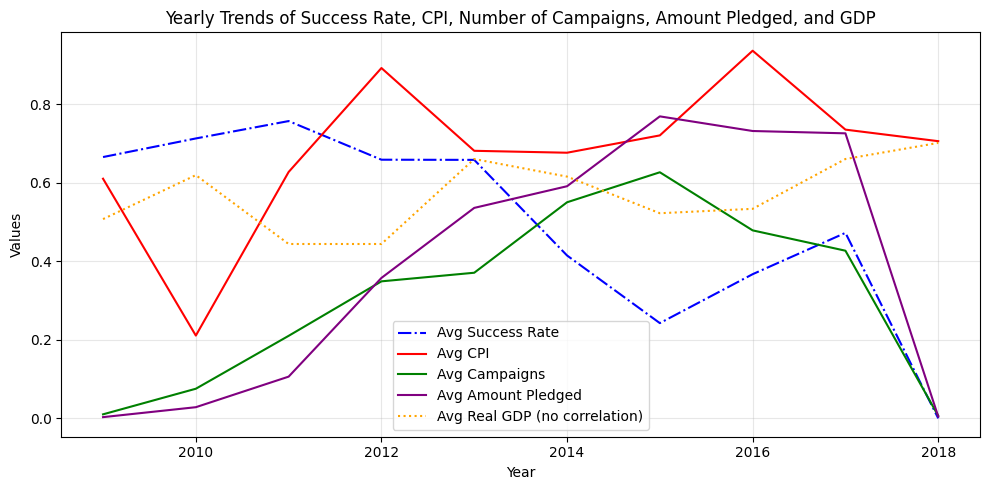

In [40]:
plt.figure(figsize=(10, 5))

# Plot each trend by year for clearer visualization
plt.plot(yearly_data['Year'], yearly_data['Avg_Success_Rate'], label='Avg Success Rate', linestyle='-.', color='blue')
plt.plot(yearly_data['Year'], yearly_data['Avg_CPI'], label='Avg CPI', linestyle='-', color='red')
plt.plot(yearly_data['Year'], yearly_data['Avg_Num_Campaigns'], label='Avg Campaigns', linestyle='-', color='green')
plt.plot(yearly_data['Year'], yearly_data['Avg_Amount_Pledged'], label='Avg Amount Pledged', linestyle='-', color='purple')
plt.plot(yearly_data['Year'], yearly_data['Avg_Real_GDP'], label='Avg Real GDP (no correlation)', linestyle=':', color='orange')

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Trends of Success Rate, CPI, Number of Campaigns, Amount Pledged, and GDP')
plt.legend()

# Add gridlines
plt.grid(alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

### Logistic Regression Model

Encoding the Category Column

In [41]:
label_encoder = LabelEncoder()
df_simplified['Category_encoded'] = label_encoder.fit_transform(df_simplified['Category'])

C:\Users\josep\AppData\Local\Temp\ipykernel_28740\1903127614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['Category_encoded'] = label_encoder.fit_transform(df_simplified['Category'])


Train Test Split with Logistic Regression

In [42]:
X = df_simplified[['Category_encoded', 'Goal', 'Duration', 'Backers']]
y = df_simplified['Success']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

In [44]:
# implementing logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
accuracy_scores = []

In [46]:
y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy: " + str(train_accuracy)) # 89.2% accuracy

test_classification_rep = classification_report(y_train, y_train_pred)
print(test_classification_rep)

Training accuracy: 0.8916863575871153
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    188030
           1       0.92      0.76      0.84    106522

    accuracy                           0.89    294552
   macro avg       0.90      0.86      0.88    294552
weighted avg       0.89      0.89      0.89    294552



In [47]:
y_test_pred = model.predict(X_test)
y_test_pred

test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
print("Testing accuracy: " + str(test_accuracy)) # 89.1% accuracy -- no overfitting detected
print(classification_rep)

accuracy_scores.append(test_accuracy)

Testing accuracy: 0.8914433927674195
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     47019
           1       0.92      0.76      0.84     26620

    accuracy                           0.89     73639
   macro avg       0.90      0.86      0.88     73639
weighted avg       0.89      0.89      0.89     73639



10-Fold Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')  

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean()) # 89.1% accuracy -- generalizes well
print("Standard deviation:", scores.std()) # 0.0111

c:\Users\josep\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\josep\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross-validation scores: [0.86404128 0.88986664 0.89353323 0.90885141 0.89874793 0.88505934
 0.88440751 0.891795   0.89347891 0.8959233 ]
Mean accuracy: 0.8905704553592386
Standard deviation: 0.011050341996223127


Including CPI data

In [49]:
X_1 = df_simplified[['Category_encoded', 'Goal', 'Duration', 'Backers', 'CPI']]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.20, random_state=69)

model_CPI = LogisticRegression()
model_CPI.fit(X_train_1, y_train_1)

y_train_pred_1 = model_CPI.predict(X_train_1)
y_pred_1 = model_CPI.predict(X_test_1)

train_accuracy_1 = accuracy_score(y_train_1, y_train_pred_1)
test_accuracy_1 = accuracy_score(y_test_1, y_pred_1)
classification_rep_1 = classification_report(y_test_1, y_pred_1)
print(test_accuracy_1) # 89.2% accuracy -- no distinct change
print(classification_rep_1) 


accuracy_scores.append(test_accuracy)

0.8921902796072734
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     47019
           1       0.92      0.77      0.84     26620

    accuracy                           0.89     73639
   macro avg       0.90      0.86      0.88     73639
weighted avg       0.89      0.89      0.89     73639



c:\Users\josep\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


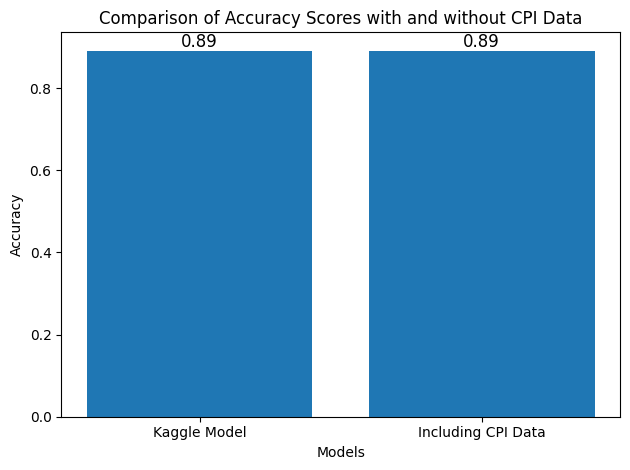

In [50]:
# visual comparison between model only using Kickstarter data and model including CPI data
labels = ['Kaggle Model', 'Including CPI Data']

plt.figure()
plt.bar(labels, accuracy_scores)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores with and without CPI Data')

for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Changing Hyperparameters

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         
    'solver': ['liblinear', 'lbfgs'],               
    'max_iter': [100, 200, 500, 1000]          
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [53]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [54]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test) # increasing accuracy to 0.898

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Classification Report:\n", classification_rep)

Train accuracy: 0.898235286129444
Test accuracy: 0.8980295767188582
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     47019
           1       0.92      0.79      0.85     26620

    accuracy                           0.90     73639
   macro avg       0.90      0.87      0.89     73639
weighted avg       0.90      0.90      0.90     73639

